In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image
import seaborn as sns
sns.set()

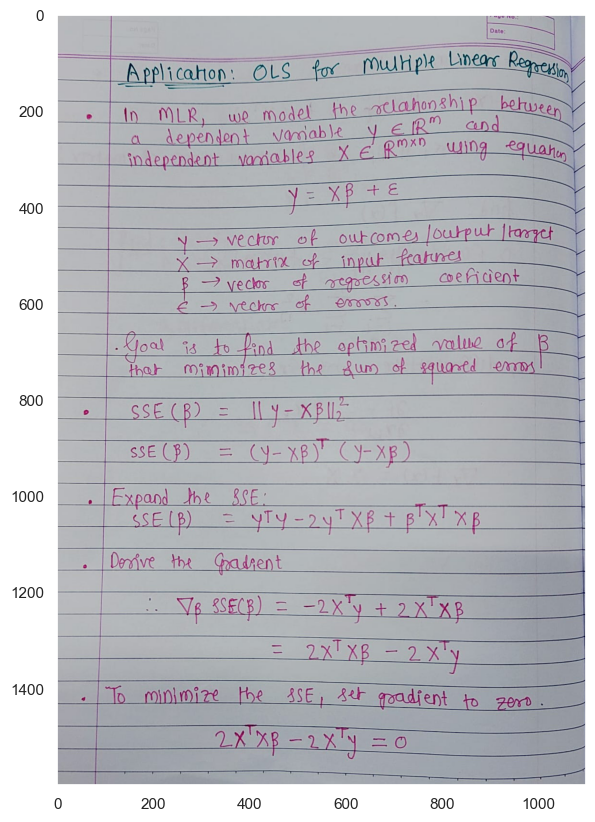

In [3]:
plt.figure(figsize= (8,10))
s = plt.imread(r"md14.jpeg")
plt.grid()
plt.imshow(s);

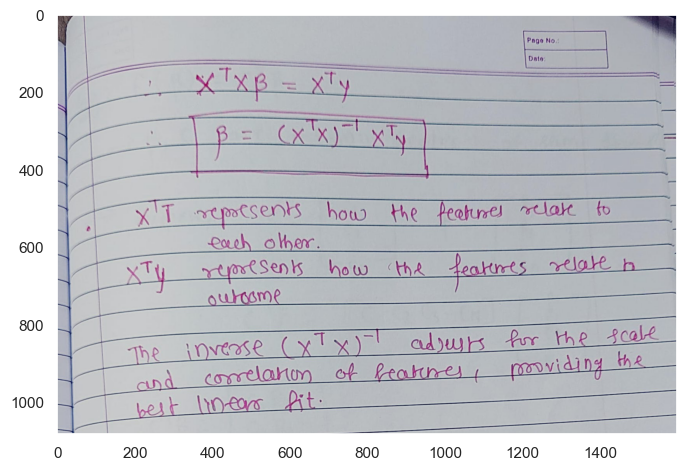

In [4]:
plt.figure(figsize= (8,10))
s = plt.imread(r"md15.jpeg")
plt.grid()
plt.imshow(s);

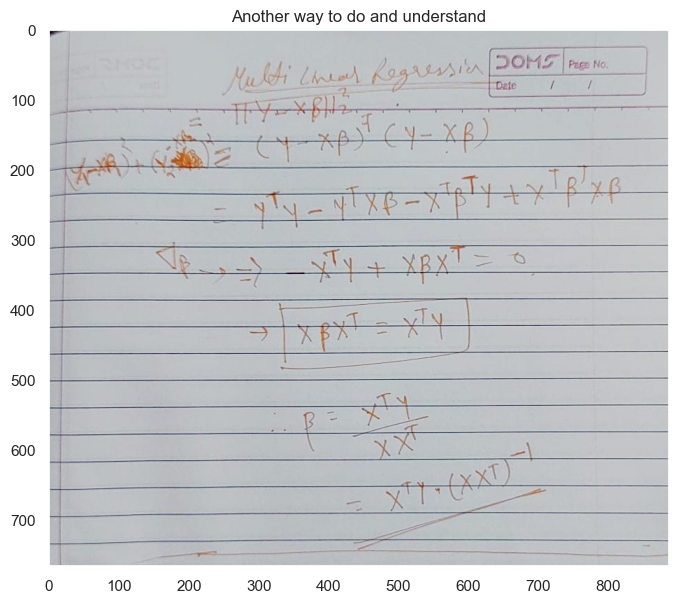

In [5]:
plt.figure(figsize= (8,10))
s = plt.imread(r"md16.jpeg")
plt.title('Another way to do and understand')
plt.grid()
plt.imshow(s);

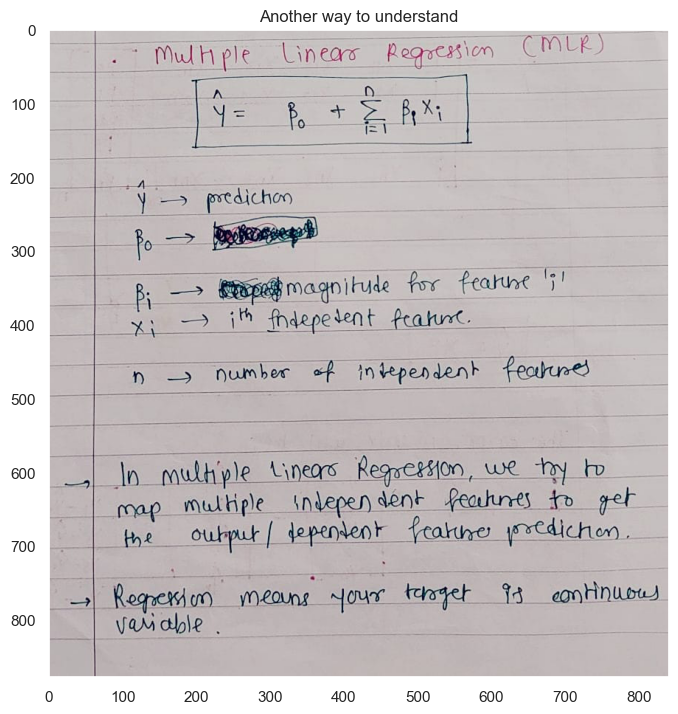

In [12]:
plt.figure(figsize= (8,10))
s = plt.imread(r"md17.jpeg")
plt.title('Another way to understand')
plt.grid()
plt.imshow(s);

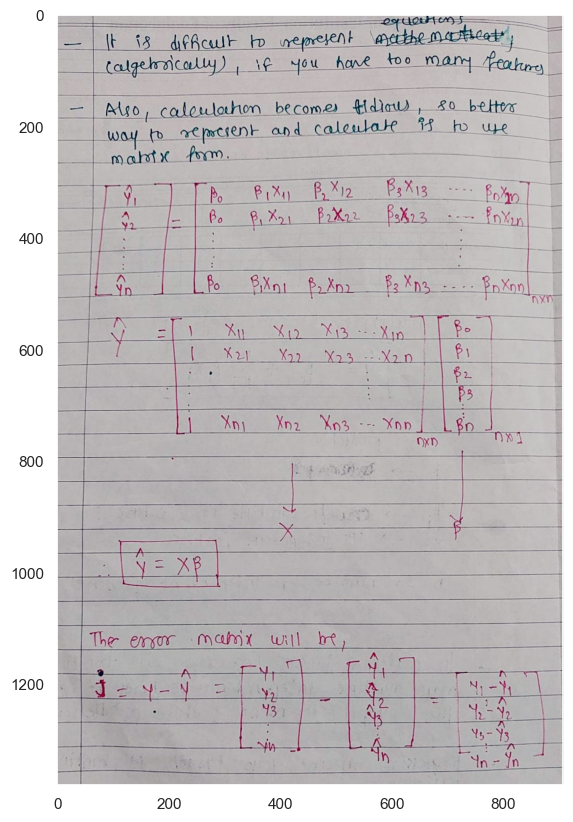

In [11]:
plt.figure(figsize= (8,10))
s = plt.imread(r"md18.jpeg")
plt.grid()
plt.imshow(s);

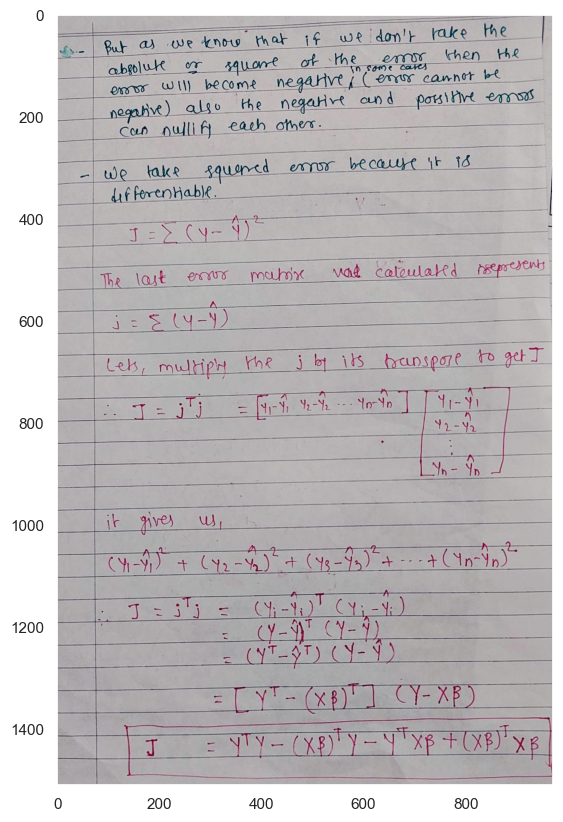

In [10]:
plt.figure(figsize= (8,10))
s = plt.imread(r"md19.jpeg")
plt.grid()
plt.imshow(s);

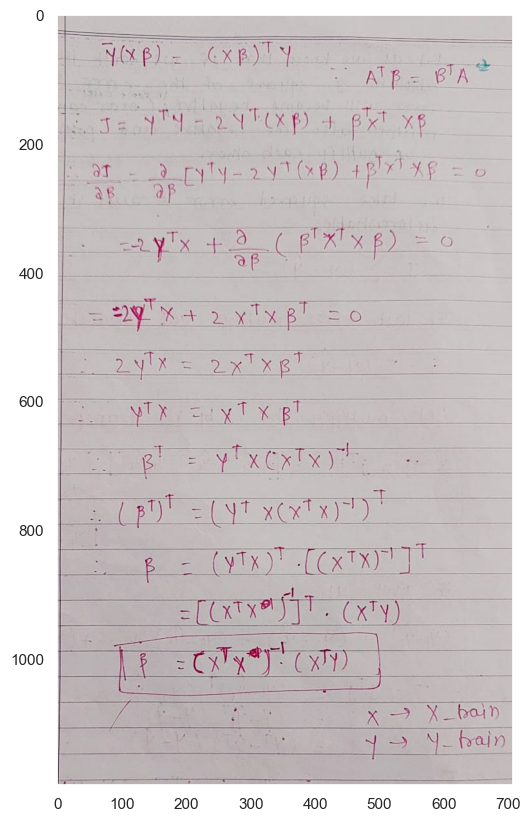

In [9]:
plt.figure(figsize= (8,10))
s = plt.imread(r"md20.jpeg")
plt.grid()
plt.imshow(s);

In [28]:
import numpy as np
from sklearn.datasets import load_diabetes

In [5]:
X,y = load_diabetes(return_X_y=True)

In [6]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [7]:
X.shape

(442, 10)

In [8]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [9]:
y.shape

(442,)

## Using Sklearn's Linear Regression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_test,y_pred)

0.4399338661568968

In [19]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [20]:
reg.intercept_

151.88331005254167

## Making our own Linear Regression Class

In [21]:
class MLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
        
    

In [22]:
lr = MLR()

In [23]:
lr.fit(X_train,y_train)

In [24]:
X_train.shape

(353, 10)

In [25]:
y_pred = lr.predict(X_test)

In [26]:
r2_score(y_test,y_pred)

0.43993386615689656

In [27]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [61]:
lr.intercept_

151.8833452085463

### Test (Do it yourself)

`Create a class to predict for the multi linear regression`

In [35]:
class multi_linear_regression:
    '''
    This class consist of the init method for the initilization, fit method to learn parameters and a predict method to predict for the unseen data
    '''

    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, X_train, X_test):
        '''
        Input: Independent variables and a dependent variable
        Output: Learn parameter slope and intercept
        '''
        X_train = np.insert(X_train, 0, 1, axis= 1) # to add a column for the intercept b0 with value 1
        
        # calculate the coeffeicient/slope
        bita = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train) # bita(b) = (inverse of(x.transpose * X) * x.transpose * y)
        
        self.intercept = bita[0] # updating intercept
        self.slope = bita[1:] # updating coefficient/slope

        return f'The intercept is {self.intercept}, \nSlope/Coefficient is {self.slope}'

    def predict(self, X_test):
        '''
        Input: Unseen data
        Output: Prediction
        '''
        prediction = np.dot(X_test, self.slope) + self.intercept

        return prediction

In [36]:
X,y = load_diabetes(return_X_y=True)

X.shape, y.shape

((442, 10), (442,))

In [37]:
# split data in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

X_train.shape, X_test.shape

((353, 10), (89, 10))

In [38]:
# create instance

multiLR = multi_linear_regression()

In [40]:
# Fit the model

print(multiLR.fit(X_train, y_train))

The intercept is 152.5380470138517, 
Slope/Coefficient is [ -35.55025079 -243.16508959  562.76234744  305.46348218 -662.70290089
  324.20738537   24.74879489  170.3249615   731.63743545   43.0309307 ]


In [43]:
# predict for the testing data

prediction = multiLR.predict(X_test)
prediction

array([238.46949509, 248.92812015, 164.05732579, 120.30774826,
       187.42483427, 259.04746969, 113.55788482, 188.07762807,
       149.49521726, 236.00758247, 172.24561893, 178.87936198,
       109.16034679,  92.13333574, 243.32766187,  87.35445583,
       155.72165684,  66.98992013, 100.42233598, 218.0957236 ,
       196.6646301 , 161.2972646 , 161.70870434, 156.52404017,
       197.88770177, 167.58280539, 120.7427979 ,  84.84033238,
       192.03438449, 160.60496231, 175.17348034,  84.22759674,
       145.80002729, 145.97264454, 140.96436257, 197.00423168,
       165.94319214, 190.6597389 , 128.22361933, 206.41497077,
        84.3575017 , 164.02262498, 144.10639773, 184.68996616,
       177.80076449,  74.33261184, 143.36644877, 138.68063137,
       120.80857573, 234.34288711, 161.94132344,  74.54325994,
       154.71683591, 156.78815442, 237.41798756, 174.23210042,
       190.87871793, 118.98140389, 132.20521501, 168.52914416,
       214.73950634, 171.42284128, 157.37648738, 108.86

In [44]:
# check score

r2_score(y_test,prediction)

0.33223321731061795

### Checking answer using the sklearn

In [45]:
reg = LinearRegression()

In [46]:
reg.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = reg.predict(X_test)

In [48]:
r2_score(y_test,y_pred)

0.3322332173106183

In [49]:
reg.coef_

array([ -35.55025079, -243.16508959,  562.76234744,  305.46348218,
       -662.70290089,  324.20738537,   24.74879489,  170.3249615 ,
        731.63743545,   43.0309307 ])

In [50]:
reg.intercept_

152.5380470138517